In [112]:
# Required Libraries
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from collections import Counter

In [113]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Experiments/Galvan-Zipf
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Experiments/Galvan-Zipf
text8  voca.txt


In [114]:
def read_file1(file_path): # for vocab
    word_count = {}
    with open(file_path, 'r') as file:
        for line in file:
            word, count = line.strip().split()
            word_count[word] = int(count)
    return word_count

    
def read_file2(file_path): # for text8
    with open(file_path, 'r') as file:
        text = file.read()
    word_count = Counter(text.split())
    return word_count

## Vocab from G

In [115]:
file_path_voca = 'voca.txt'
word_count_voca = read_file1(file_path_voca)

In [116]:
counts_voca = np.array(list(word_count_voca.values()))
sorted_counts_voca = np.sort(counts_voca)[::-1]
normalized_counts_voca = sorted_counts_voca / sorted_counts_voca[0]

## text8

In [117]:
file_path_text8 = 'text8'
word_count_text8 = read_file2(file_path_text8)

In [118]:
counts_text8 = np.array(list(word_count_text8.values()))
sorted_counts_text8 = np.sort(counts_text8)[::-1]

# Normalize word counts
normalized_counts_text8 = sorted_counts_text8 / sorted_counts_text8[0]

### Zipf Curve

In [119]:
ranks = np.arange(1, len(sorted_counts_text8) + 1)
ideal_counts = 1.0 / ranks

## Plot

In [120]:
make_x = lambda list_y: range(1, len(list_y) + 1)

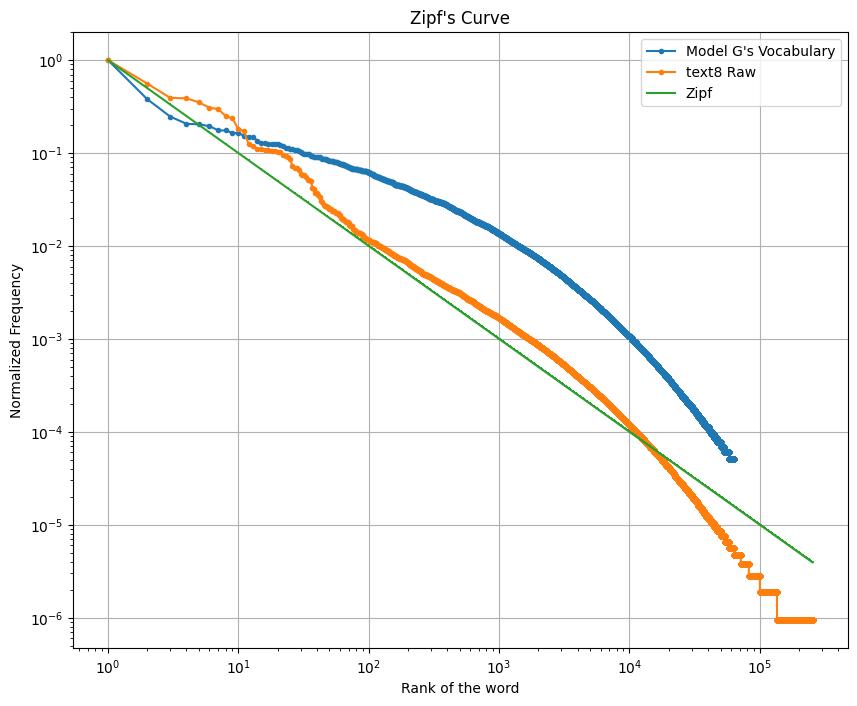

In [121]:
plt.figure(figsize=(10, 8))

plt.loglog(make_x(sorted_counts_voca), normalized_counts_voca, marker='.', label="Model G's Vocabulary")
plt.loglog(make_x(sorted_counts_text8), normalized_counts_text8, marker='.', label = "text8 Raw")
plt.loglog(ranks, ideal_counts, marker=',', label = "Zipf")

plt.title('Zipf\'s Curve (Log Scaled)')
plt.xlabel('Rank of the word')
plt.ylabel('Normalized Frequency')

plt.legend()
plt.grid(True)

plt.show()

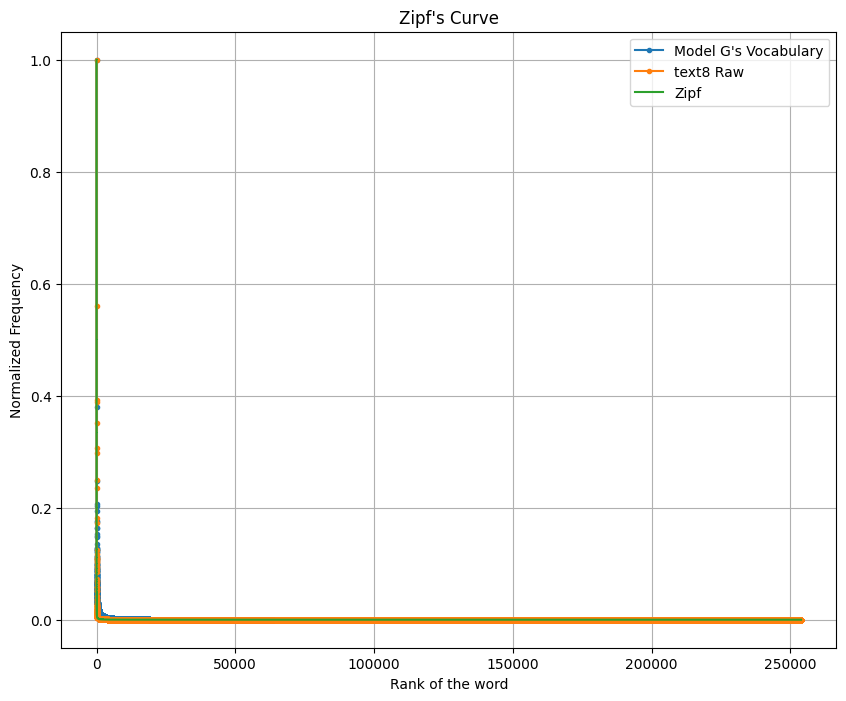

In [127]:
plt.figure(figsize=(10, 8))

plt.plot(make_x(sorted_counts_voca), normalized_counts_voca, marker='.', label="Model G's Vocabulary")
plt.plot(make_x(sorted_counts_text8), normalized_counts_text8, marker='.', label = "text8 Raw")
plt.plot(ranks, ideal_counts, marker=',', label = "Zipf")

plt.title('Zipf\'s Curve')
plt.xlabel('Rank of the word')
plt.ylabel('Normalized Frequency')

plt.legend()
plt.grid(True)

plt.show()

### Closer look

In [123]:
first100 = lambda long_list : long_list[:100]

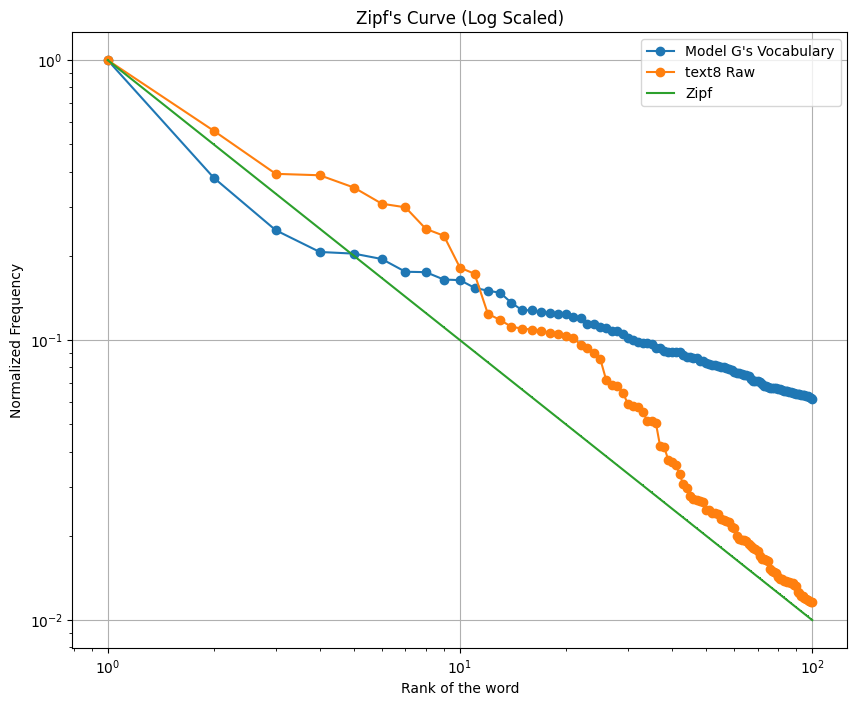

In [128]:
plt.figure(figsize=(10, 8))

plt.loglog(first100(make_x(sorted_counts_voca)), first100(normalized_counts_voca), marker='o', label="Model G's Vocabulary")
plt.loglog(first100(make_x(sorted_counts_text8)), first100(normalized_counts_text8), marker='o', label = "text8 Raw")
plt.loglog(first100(ranks), first100(ideal_counts), marker=',', label = "Zipf")

plt.title('Zipf\'s Curve (Log Scaled)')
plt.xlabel('Rank of the word')
plt.ylabel('Normalized Frequency')

plt.legend()
plt.grid(True)

plt.show()

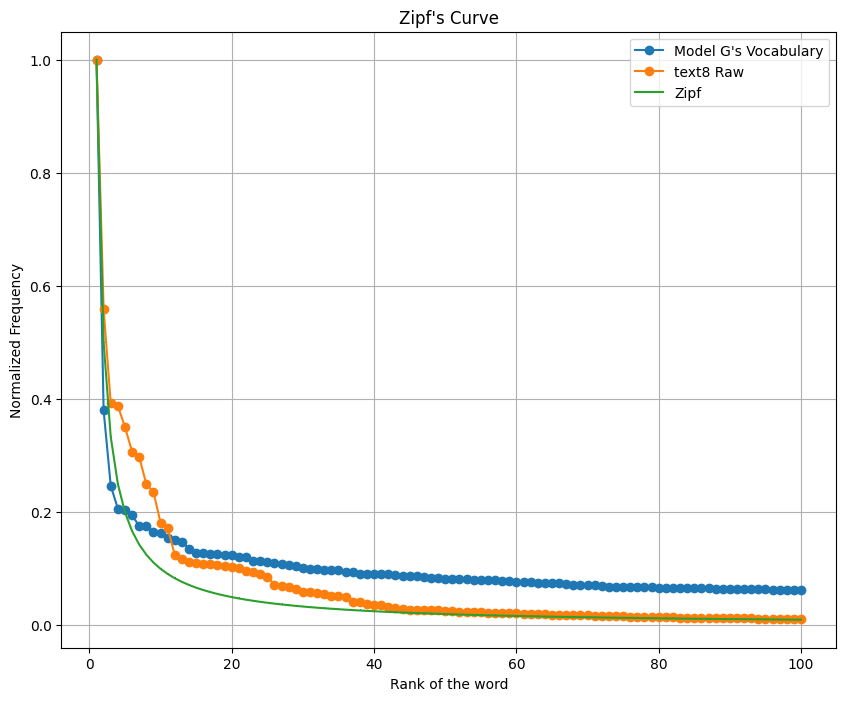

In [125]:
plt.figure(figsize=(10, 8))

plt.plot(first100(make_x(sorted_counts_voca)), first100(normalized_counts_voca), marker='o', label="Model G's Vocabulary")
plt.plot(first100(make_x(sorted_counts_text8)), first100(normalized_counts_text8), marker='o', label = "text8 Raw")
plt.plot(first100(ranks), first100(ideal_counts), marker=',', label = "Zipf")

plt.title('Zipf\'s Curve')
plt.xlabel('Rank of the word')
plt.ylabel('Normalized Frequency')

plt.legend()
plt.grid(True)

plt.show()